In [70]:
from queue import Queue
import math
import random
from copy import copy, deepcopy
from matplotlib import pyplot as plt

#Utility Functions

#1. Formatiing queen position
#  sol - a solution string
#  n   - number of bits required in final solution
def format_solution(sol,n):    
    while(len(sol)<n):
        sol= '0'+sol
    return sol

#2. Initial Population
#  b_size = board size
#  n_q = number of queens
def in_populate(b_size, n_q, gen_size):
    max_positions = b_size**2
    n = b_size**2
    n_bits = int(math.ceil(math.log(max_positions,2)))
    #print(n)
    q = Queue()
    q.put("1")
    possible_solutions = []
    while(n > 0):
        n -= 1        
        s1 = q.get()
        possible_solutions.append(format_solution(s1,n_bits)) 
        s2 = s1       
        q.put(s1+"0")       
        q.put(s2+"1")
    
    #random initialization
    gen_1 = []
    for i in range(gen_size):
        initial_pop = []
        initial_pop_indexes = random.sample(range(0, len(possible_solutions)), n_q)
        for j in initial_pop_indexes:
            initial_pop.append(possible_solutions[j])
        gen_1.append(initial_pop)
    #print(possible_solutions)
    return(gen_1)

# 3. Fintess function 
#   sol_list = solution list
#   n        = board size)
def fitness(sol_list , n):
    #board is n X n
    board = []
    val = 0
    for i in range(n):
        row= []
        for j in range(n):
            row.append(val)
            val+=1
        board.append(row)
    sol = []
    for i in sol_list:
        sol.append(int(i,2))
    positions=[]
    #fit = []
    for i in sol:
        p = i//n
        q = i%n
        if(p>19):
            p=19
        #print(i,p,q)
        
        #north
        for j in range(0,p):
            #print(j,q,i)
            if(board[j][q] not in positions):
                positions.append(board[j][q])
        #south
        for j in range(p,n):
            #print(j,q,i)
            if(board[j][q] not in positions):
                positions.append(board[j][q])
        #west
        for j in range(0,q):
            #print(p,j,i)
            if(board[p][j] not in positions):
                positions.append(board[p][j])
        #east
        for j in range(q,n):
            #print(p,j,1)
            if(board[p][j] not in positions):
                positions.append(board[p][j])
        a,b = p,q
        #north-west
        while(-1<a<n and -1<b<n):
            if(board[a][b] not in positions):
                positions.append(board[a][b])
            a-=1
            b-=1
        #north-east
        while(-1<a<n and -1<b<n):
            if(board[a][b] not in positions):
                positions.append(board[a][b])
            a-=1
            b+=1
        #south-west
        while(-1<a<n and -1<b<n):
            if(board[a][b] not in positions):
                positions.append(board[a][b])
            a-=1
            b+=1
        #south-east    
        while(-1<a<n and -1<b<n):
            if(board[a][b] not in positions):
                positions.append(board[a][b])
            a+=1
            b+=1
        #fit.append(len(positions))
    return(len(positions))
#print(fitness(['01101101', '00001110', '10001101', '10000010', '00111001', '00101010'],20))
        
# 4. Selection(gen) 
#returns the best two chromosomes from agiven generation
def selection_best_two(gen,num):
    gen_len = len(gen)
    best_sol = []
    sbest_sol = []
    best_score = 0
    secbest_score = 0
    n = 20
    for i in gen:
        if(fitness(i,20)>=best_score):
            sbest_sol = best_sol
            secbest_score = best_score
            best_score = fitness(i,20)
            best_sol = i
    #return [best_score , secbest_score]
    if(num == 2):
        return [best_sol, sbest_sol]
    else:
        return best_sol

#5. average fitness of a population
def find_avg_fitness(gen):
    total = 0
    n = 20
    size = len(gen)
    for i in gen:
        total += fitness(i,n)
    return total/size

#6. Crossmutation(a,b) - returns generation of size 30 with a,b as parent
# a - chosen parent chromosome
# b - chosen parent chromosome
def crossmutate_only_two_parents(a,b):
    offsprings=[]
    #single point crossover
    for i in range(5):
        x = deepcopy(b)
        y = deepcopy(a)
        r = random.randint(1,len(a)-1)
        x[:r] = a[:r]
        y[:r] = b[:r]
        #print(r)
        offsprings.append(x)
        offsprings.append(y)        
    
    #double-point crossover
    for i in range(10):
        c = deepcopy(b)
        d = deepcopy(a)
        p = random.randint(0,len(b)-1)
        q  = random.randint(0,len(b)-1)
        c[p] = a[q]
        d[q] = b[p]
        offsprings.append(c)
        offsprings.append(d)
    
    return offsprings

        
# 7. Returns list of best ten solutions asper fitness function
#(decreasing order of fitness)
def selection_best_ten(gen):
    gen_len = len(gen)
    best_ten = []
    scores = []
    inds=[]#storing indeces of selected solutions
    for i in gen:
        scores.append(fitness(i,20))
    for i in range(10):
        m = scores.index(max(scores))
        inds.append(m)
        scores[m] = 0
    for i in inds:
        best_ten.append(gen[i])
    #returns in decreasing order of fitness 
    #for i in best_ten:
        #print(fitness(i,20))
    return best_ten

# 8. Runs the roulette wheel once on a set of ten solutions
# Solutions must be ordered in decreasing order of fitness
def run_roulette_wheel(best_ten):
    r = random.randint(0,360) #degeree of pointer after each spin
    chosen_two = []
    for i in range(15):
        if(0<=r<=140):
            chosen_two =[best_ten[0],best_ten[1]]
        elif(141<=r<=220):
            chosen_two =[best_ten[2],best_ten[3]]
        elif(221<=r<=286):
            chosen_two =[best_ten[4],best_ten[5]]
        elif(287<=r<=338):
            chosen_two =[best_ten[6],best_ten[7]]
        elif(339<=r<=360):
            chosen_two =[best_ten[8],best_ten[9]]
    return chosen_two
        
# 9. crossmutation after roulette wheel selection
# uses two functions run_roulette wheel and selection_best_ten
def crossmutuate_after_roulette_wheel(gen):
    best_ten = selection_best_ten(gen)
    offsprings=[]
    #single point crossover
    for i in range(15):
        chosen_two = run_roulette_wheel(best_ten)
        a = chosen_two[0]
        b = chosen_two[1]
        x = deepcopy(b)
        y = deepcopy(a)
        #r = random.randint(1,len(a)-1)
        r = 3 #fixing crossmutation point
        x[:r] = a[:r]
        y[:r] = b[:r]
        #print(r)
        offsprings.append(x)
        offsprings.append(y)
    return offsprings
    
#10. Mutations (Random)
def insert_mutation(gen,n):
    for i in range(n):
        r = random.randint(0,len(gen)-1)
        s = random.randint(0,len(gen[1])-1)
        t = random.randint(3,len(gen[1][1])-1)#Handling constraints
        #print(gen[r][s])
        li = list(gen[r][s])
        if(li[t] == '0'):
            li[t]='1'
            #a = a[:4] +'1'+ a[5:]
        else:
            li[t]='0'
        gen[r][s] = ''.join(li)
        #print(gen[r][s])
    
    #print(r,s,t)
    return gen

#11. get_conv_rate(arr):
#  arr = fitness array of an evolution cycle
def get_conv_rate(arr):
    diff= []
    for i in range(len(arr)-1):
        diff.append(arr[i+1]-arr[i])
    return sum(diff)   #100/400 is 4

#12. Elitist Selection
# a,b are best solution of current generation
def elitist_selection(a,b):
    offsprings=[]
    
    #Preserving the parents(parents fed to this function are the best two of the generation)
    offsprings.append(a)
    offsprings.append(b)
    #single point crossover
    for i in range(5):
        x = deepcopy(b)
        y = deepcopy(a)
        r = random.randint(0,len(a)-1)
        x[:r] = a[:r]
        y[:r] = b[:r]
        #print(r)
        offsprings.append(x)
        offsprings.append(y)        
    
    #double-point crossover
    for i in range(9):
        c = deepcopy(b)
        d = deepcopy(a)
        p = random.randint(1,len(b)-2)
        q  = random.randint(1,len(b)-2)
        c[p] = a[q]
        d[q] = b[p]
        offsprings.append(c)
        offsprings.append(d)
    
    return offsprings

In [3]:
#initializing population
initpop = in_populate(20,14,30)
print('Average fitness of initial Population:  ',find_avg_fitness(initpop))

Average fitness of initial Population:   327.9


Average fitness of Generation  1  :  340.7
Fitness of Best solution          :  353
Average fitness of Generation  2  :  340.0
Fitness of Best solution          :  350
Average fitness of Generation  3  :  350.8
Fitness of Best solution          :  355
Average fitness of Generation  4  :  351.3666666666667
Fitness of Best solution          :  362
Average fitness of Generation  5  :  361.1666666666667
Fitness of Best solution          :  367
Average fitness of Generation  6  :  364.1666666666667
Fitness of Best solution          :  374
Average fitness of Generation  7  :  370.3
Fitness of Best solution          :  374
Average fitness of Generation  8  :  374.0
Fitness of Best solution          :  374
Average fitness of Generation  9  :  374.0
Fitness of Best solution          :  374
Average fitness of Generation  10  :  374.0
Fitness of Best solution          :  374
Average fitness of Generation  11  :  374.1
Fitness of Best solution          :  375
Average fitness of Generation  12  :  

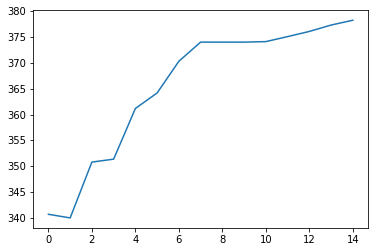

37.53333333333336


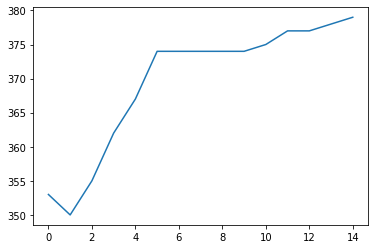

In [95]:
#testing roulette wheel selection


#print(selection_best_two(initpop))
fitness_array_wheel = []
fitness_array_wheel_best = []
gen_count = 0
new_gen = deepcopy(initpop)
#iterating till condition
while(gen_count<15 and int(find_avg_fitness(new_gen)) != int(fitness(selection_best_two(new_gen,1),20))):
    gen_count+=1
    new_gen = crossmutuate_after_roulette_wheel(new_gen)
    print('Average fitness of Generation ',gen_count,' : ',find_avg_fitness(new_gen))
    fitness_array_wheel.append(find_avg_fitness(new_gen))
    print('Fitness of Best solution          : ',fitness(selection_best_two(new_gen,1),20))
    fitness_array_wheel_best.append(fitness(selection_best_two(new_gen,1),20))
    #print(selection_best_two(new_gen))
    new_gen = insert_mutation(new_gen,20)
    
plt.plot(fitness_array_wheel)
plt.show()
print(get_conv_rate(fitness_array_wheel))
plt.plot(fitness_array_wheel_best)
plt.show()

Average fitness of Generation  1  :  346.9
Fitness of Best solution          :  360
Average fitness of Generation  2  :  352.1
Fitness of Best solution          :  370
Average fitness of Generation  3  :  353.125
Fitness of Best solution          :  368
Average fitness of Generation  4  :  352.65
Fitness of Best solution          :  367
Average fitness of Generation  5  :  353.55
Fitness of Best solution          :  371
Average fitness of Generation  6  :  358.575
Fitness of Best solution          :  371
Average fitness of Generation  7  :  363.625
Fitness of Best solution          :  373
Average fitness of Generation  8  :  366.0
Fitness of Best solution          :  374
Average fitness of Generation  9  :  368.075
Fitness of Best solution          :  376
Average fitness of Generation  10  :  367.5
Fitness of Best solution          :  376
Average fitness of Generation  11  :  366.6
Fitness of Best solution          :  376
Average fitness of Generation  12  :  368.275
Fitness of Best so

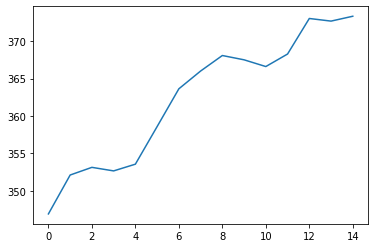

26.42500000000001


In [57]:
#testing 2 best parents selection


#print(selection_best_two(initpop))
gen_count = 0
new_gen = deepcopy(initpop)
best_two = selection_best_two(new_gen,2)
fitness_array_best_two=[]
#iterating till condition
while(gen_count<15 and (find_avg_fitness(new_gen))!=fitness(selection_best_two(new_gen,1),20)):
    gen_count+=1    
    new_gen = crossmutate_only_two_parents(best_two[0],best_two[1])
    print('Average fitness of Generation ',gen_count,' : ',find_avg_fitness(new_gen))
    fitness_array_best_two.append(find_avg_fitness(new_gen))
    print('Fitness of Best solution          : ',fitness(selection_best_two(new_gen,1),20))
    new_gen = insert_mutation(new_gen,25)
    best_two = selection_best_two(new_gen,2)
    
plt.plot(fitness_array_best_two)
plt.show()
print(get_conv_rate(fitness_array_best_two))

Average fitness of Generation  1  :  344.0
Fitness of Best solution          :  360
Average fitness of Generation  2  :  352.93333333333334
Fitness of Best solution          :  368
Average fitness of Generation  3  :  358.3666666666667
Fitness of Best solution          :  368
Average fitness of Generation  4  :  361.73333333333335
Fitness of Best solution          :  368
Average fitness of Generation  5  :  362.53333333333336
Fitness of Best solution          :  368
Average fitness of Generation  6  :  361.73333333333335
Fitness of Best solution          :  368
Average fitness of Generation  7  :  363.1666666666667
Fitness of Best solution          :  371
Average fitness of Generation  8  :  363.93333333333334
Fitness of Best solution          :  371
Average fitness of Generation  9  :  364.56666666666666
Fitness of Best solution          :  371
Average fitness of Generation  10  :  364.56666666666666
Fitness of Best solution          :  371
Average fitness of Generation  11  :  364.46

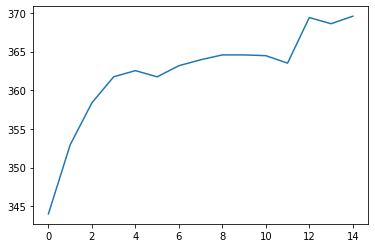

25.566666666666663


In [88]:
#ELITIST SELECTION

gen_count = 0
new_gen = deepcopy(initpop)
best_two = selection_best_two(new_gen,2)
fitness_array_elitist=[]
#iterating till condition
while(gen_count<15 and (find_avg_fitness(new_gen))!=fitness(selection_best_two(new_gen,1),20)):
    gen_count+=1    
    new_gen = elitist_selection(best_two[0],best_two[1])
    print('Average fitness of Generation ',gen_count,' : ',find_avg_fitness(new_gen))
    fitness_array_elitist.append(find_avg_fitness(new_gen))
    print('Fitness of Best solution          : ',fitness(selection_best_two(new_gen,1),20))
    new_gen = insert_mutation(new_gen,5)
    best_two = selection_best_two(new_gen,2)
    
plt.plot(fitness_array_elitist)
plt.show()
print(get_conv_rate(fitness_array_elitist))

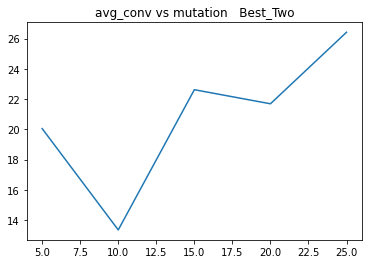

In [61]:
mutation_best_two = [20.05 , 13.35 , 22.62 , 21.69 , 26.42]
#mutations = [5,10,15,20,25]
plt.plot([5,10,15,20,25], [20.05 , 13.35 , 22.62 , 21.69 , 26.42])
plt.title('avg_conv vs mutation   Best_Two')
plt.show()

67004/25

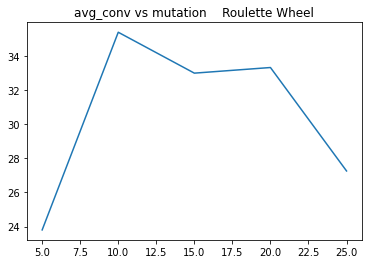

In [68]:
mutation_roulette_wheel = [23.8, 35.4, 33.0 , 33.33 , 28.23]
#mutations = [5,10,15,20,25]
plt.plot([5,10,15,20,25], [23.8, 35.4, 33.0 , 33.33 , 27.26])
plt.title('avg_conv vs mutation    Roulette Wheel')
plt.show()

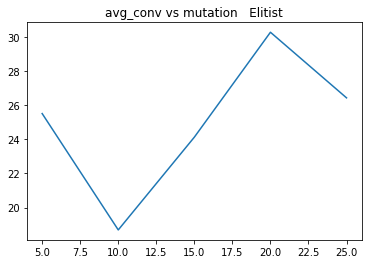

In [90]:
mutation_elitist = [25.5 , 18.69 , 24.12 , 30.26 , 26.42]
#mutations = [5,10,15,20,25]
plt.plot([5,10,15,20,25], [25.5 , 18.69 , 24.12 , 30.26 , 26.42])
plt.title('avg_conv vs mutation   Elitist')
plt.show()